## Group Proposal
_________________________________________

## Predicting whether an NBA player will make it to the All-Star team based on their performance statistics in the 2023 season using the 2021-2022 seasons.


**Introduction**

Our group proposal aims to predict which NBA players will make it to the All-Star selections for 2023 season based on their performance using K-Nearest Neighbour classification method. The NBA is a professional basketball league in North America with 30 teams. Each team consists of players who compete against each other in regular season games, with the goal of making it to the playoffs and eventually winning the NBA championship.

The All-Star game is an annual exhibition game featuring the best players from each conference, selected based on a combination of fan, player, and media voting. Being selected to the All-Star team is a significant accomplishment for NBA players and is often seen as a sign of their individual success and impact on the league.

In recent years, there has been an increasing interest in using machine learning and data analysis techniques to predict various outcomes in sports, including player performance, team success, and player awards such as All-Star selections. The NBA 2021-2022 per-game statistics dataset provides a rich source of data that can be used to build predictive models for various outcomes, including predicting whether a player will make it to the All-Star team in the 2023 season. 

**Method**

We will use the NBA 2021-2022 per-game statistics dataset to build a predictive classification model to predict All-Star selections. We will consider data like the player performance, team success, fan voting, and positional balance. Player performance metrics such as points per game, rebounds per game, assists per game, and shooting percentages could also be crucial in our model. Overall, All-Star selection is a combination of objective performance metrics and subjective factors such as popularity and positional balance.

Therefore we will use data points like the player’s rank, player’s names and teams, their effective field goal percentage, offensive, defensive rebounds per game and total rebounds per game, and  points per game. For our visualizations, we will use mainly scatter plots since we're dealing with multiple quantitative variables.

To make our predictions, we will be using K-nearest neighbor classification which is found in the parsnip package in R in the tidymodel library. We will use cross validation to find the best value of K that we can use in our project. We will then fit the model onto the dataset and retrain with our best K value. Then predict the All-Star category of the player by using the model on the test dataset. We will verify the accuracy of the model using validation set and relevant metrics towards the end along with a confusion matrix. 

Let's start by loading the important libraries. 

In [2]:
### Loading of base packages manually 

library(datasets)   # loading of library datasets
library(tidyverse)  # loading of tidyverse library
library(tidymodels)
library(tibble)
library(httr)
options(repr.matrix.max.rows = 6)
# source('tests.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We will read data from the team statistics page for the 2021 - 2022 NBA season and the 2022-2023 NBA season given below in code. 

In [3]:
# URL of the team statistics page for the 2021-2022 NBA season and 2022-2023 NBA season.
# data pulled from: url1 <- "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"
#                   url2 <- "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
basket_2023 <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/NBA%202022-2023(1).csv")
basket_2023

basket_2022 <- read_csv("https://raw.githubusercontent.com/DrakenRaptor/Section006-28-Proposal/main/2021-2022%20NBA.csv")
basket_2022

Rows: 644 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Player, Pos, Tm, Player-additional\
dbl (27): Rk, Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,23,TOR,42,11,947,156,325,⋯,81,184,265,42,26,26,49,85,408,achiupr01\
2,Steven Adams,C,29,MEM,42,42,1133,157,263,⋯,214,271,485,97,36,46,79,98,361,adamsst01\
3,Bam Adebayo,C,25,MIA,61,61,2137,509,943,⋯,154,434,588,200,75,50,153,172,1295,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514,Trae Young,PG,24,ATL,58,58,2037,486,1137,⋯,44,129,173,585,65,9,237,86,1545,youngtr01\
515,Cody Zeller,C,30,MIA,7,0,96,14,22,⋯,11,8,19,5,1,3,5,17,42,zelleco01\
516,Ivica Zubac,C,25,LAC,61,61,1780,245,396,⋯,203,413,616,65,24,81,104,179,620,zubaciv01}


Rows: 813 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Sn, Player, Pos, Tm, Player-additional\
dbl (26): Age, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sn,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional\
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,⋯,146,327,473,82,37,41,84,151,664,achiupr01\
2,Steven Adams,C,28,MEM,76,75,1999,210,384,⋯,349,411,760,256,65,60,115,153,528,adamsst01\
3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,⋯,137,427,564,190,80,44,148,171,1068,adebaba01\
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
604,Cody Zeller,C,29,POR,27,0,355,51,90,⋯,50,75,125,22,8,6,19,56,140,zelleco01\
605,Ivica Zubac,C,24,LAC,76,76,1852,310,495,⋯,217,427,644,120,36,77,114,203,785,zubaciv01\
},NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Here we will narrow down our huge dataset to contain only certain performance statistics to clean and wrangle it.

In [4]:
# Select the GS(Game Started), eFG%(Effective Field Goal Precentage), and PTS (Points Per Game) 
# to be the three main variables we will focused on in this assignment.
selected_2023 <- basket_2023 |>
                 select(Player, GS, "eFG%", PTS) 
selected_2023

selected_2022 <- basket_2022 |>
                 select(Player, GS, "eFG%", PTS) 
selected_2022

Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,11,0.512,408
Steven Adams,42,0.597,361
Bam Adebayo,61,0.540,1295
⋮,⋮,⋮,⋮
Trae Young,58,0.482,1545
Cody Zeller,0,0.636,42
Ivica Zubac,61,0.619,620


Player,GS,eFG%,PTS
<chr>,<dbl>,<dbl>,<dbl>
Precious Achiuwa,28,0.486,664
Steven Adams,75,0.547,528
Bam Adebayo,56,0.557,1068
⋮,⋮,⋮,⋮
Cody Zeller,0,0.567,140
Ivica Zubac,76,0.626,785
NA,NA,NA,NA


In [5]:
# We will make a new column containing our All Star players for 2023 and 2022 season which we categorize as "Yes" and the other players as "No".
# Create a vector for basketball player that is all-star in 2023.
all_stars_2023 <- c("Kyrie Irving", "Donovan Mitchell", "Giannis Antetokounmpo", "Kevin Durant", "Jayson Tatum", "Jaylen Brown", 
                  "DeMar DeRozan", "Tyrese Haliburton", "Jrue Holiday", "Julius Randle", "Bam Adebayo", "Joel Embiid", "Pascal Siakam", 
                  "Stephen Curry", "Luka Dončić", "Nikola Jokić", "Lebron James", "Zion Williamson", "Shai Gilgeous-Alexander", "Damian Lillard", 
                  "Ja Morant", "Paul George", "Jaren Jackson Jr.", "Lauri Markkanen", "Domantas Sabonis","Anthony Edwards", "De'Aaron Fox")
all_stars_2023

# Create a vector for basketball player that is all-star in 2022.
all_stars_2022 <- c("Stephen Curry", "LeBron James", "Giannis Antetokounmpo", "DeMar DeRozan", "Nikola Jokić", "Luka Dončić", 
                    "Darius Garland", "Jarrett Allen", "Fred VanVleet", "Jimmy Butler", "Chris Paul", "Joel Embiid", "Jayson Tatum", 
                    "Trae Young", "Ja Morant", "Andrew Wiggins", "Devin Booker", "Dejounte Murray", "LaMelo Ball", "Khris Middleton", 
                    "Karl-Anthony Towns", "Rudy Gobert", "Zach LaVine")         
all_stars_2022

# Mutate a new column to determine the player is all-star or not.
basket_2023_mutate <- selected_2023 |>
    mutate(all_star = "No")

basket_2022_mutate <- selected_2022 |>
    mutate(all_star = "No")

print(basket_2023_mutate, n = 10)
print(basket_2022_mutate, n = 10)

[1] "Kyrie Irving"            "Donovan Mitchell"       
 [3] "Giannis Antetokounmpo"   "Kevin Durant"           
 [5] "Jayson Tatum"            "Jaylen Brown"           
 [7] "DeMar DeRozan"           "Tyrese Haliburton"      
 [9] "Jrue Holiday"            "Julius Randle"          
[11] "Bam Adebayo"             "Joel Embiid"            
[13] "Pascal Siakam"           "Stephen Curry"          
[15] "Luka Dončić"             "Nikola Jokić"           
[17] "Lebron James"            "Zion Williamson"        
[19] "Shai Gilgeous-Alexander" "Damian Lillard"         
[21] "Ja Morant"               "Paul George"            
[23] "Jaren Jackson Jr."       "Lauri Markkanen"        
[25] "Domantas Sabonis"        "Anthony Edwards"        
[27] "De'Aaron Fox"

[1] "Stephen Curry"         "LeBron James"          "Giannis Antetokounmpo"
 [4] "DeMar DeRozan"         "Nikola Jokić"          "Luka Dončić"          
 [7] "Darius Garland"        "Jarrett Allen"         "Fred VanVleet"        
[10] "Jimmy Butler"          "Chris Paul"            "Joel Embiid"          
[13] "Jayson Tatum"          "Trae Young"            "Ja Morant"            
[16] "Andrew Wiggins"        "Devin Booker"          "Dejounte Murray"      
[19] "LaMelo Ball"           "Khris Middleton"       "Karl-Anthony Towns"   
[22] "Rudy Gobert"           "Zach LaVine"

# A tibble: 644 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            11  0.512   408 No      
 2 Steven Adams                42  0.597   361 No      
 3 Bam Adebayo                 61  0.54   1295 No      
 4 Ochai Agbaji                 6  0.558   232 No      
 5 Santi Aldama                18  0.567   562 No      
 6 Nickeil Alexander-Walker     3  0.582   287 No      
 7 Nickeil Alexander-Walker     3  0.591   228 No      
 8 Nickeil Alexander-Walker     0  0.55     59 No      
 9 Grayson Allen               59  0.581   648 No      
10 Jarrett Allen               60  0.651   869 No      
# … with 634 more rows
# A tibble: 813 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            28  0.486   664 No      
 2 Steven Adams                75  0.547   528 No      
 3 Bam Adebayo                 56  0.557 

In [6]:
# Change the value of the all-stars column for all-star players in 2023 to true.
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Kyrie Irving"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Donovan Mitchell"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Giannis Antetokounmpo"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Kevin Durant"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jayson Tatum"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jaylen Brown"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "DeMar DeRozan"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Tyrese Haliburton"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jrue Holiday"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Julius Randle"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Bam Adebayo"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Joel Embiid"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Pascal Siakam"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Stephen Curry"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Luka Dončić"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Nikola Jokić"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "LeBron James"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Zion Williamson"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Shai Gilgeous-Alexander"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "De'Aaron Fox"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Anthony Edwards"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Domantas Sabonis"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Lauri Markkanen"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Jaren Jackson Jr."] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Paul George"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Ja Morant"] = "Yes"
basket_2023_mutate$all_star[basket_2023_mutate$Player == "Damian Lillard"] = "Yes"
print(basket_2023_mutate, n = 10)

# A tibble: 644 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            11  0.512   408 No      
 2 Steven Adams                42  0.597   361 No      
 3 Bam Adebayo                 61  0.54   1295 Yes     
 4 Ochai Agbaji                 6  0.558   232 No      
 5 Santi Aldama                18  0.567   562 No      
 6 Nickeil Alexander-Walker     3  0.582   287 No      
 7 Nickeil Alexander-Walker     3  0.591   228 No      
 8 Nickeil Alexander-Walker     0  0.55     59 No      
 9 Grayson Allen               59  0.581   648 No      
10 Jarrett Allen               60  0.651   869 No      
# … with 634 more rows


In [7]:
# Change the value of the all-stars column for all-star players in 2022 to true.
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Stephen Curry"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "LeBron James"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Giannis Antetokounmpo"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "DeMar DeRozan"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Nikola Jokić"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Luka Dončić"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Darius Garland"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jarrett Allen"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Fred VanVleet"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jimmy Butler"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Chris Paul"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Joel Embiid"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Jayson Tatum"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Trae Young"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Ja Morant"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Andrew Wiggins"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Devin Booker"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Dejounte Murray"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "LaMelo Ball"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Khris Middleton"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Karl-Anthony Towns"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Rudy Gobert"] = "Yes"
basket_2022_mutate$all_star[basket_2022_mutate$Player == "Zach LaVine"] = "Yes"

print(basket_2022_mutate, n = 10)

# A tibble: 813 × 5
   Player                      GS `eFG%`   PTS all_star
   <chr>                    <dbl>  <dbl> <dbl> <chr>   
 1 Precious Achiuwa            28  0.486   664 No      
 2 Steven Adams                75  0.547   528 No      
 3 Bam Adebayo                 56  0.557  1068 No      
 4 Santi Aldama                 0  0.424   132 No      
 5 LaMarcus Aldridge           12  0.566   607 No      
 6 Nickeil Alexander-Walker    21  0.449   692 No      
 7 Nickeil Alexander-Walker    19  0.45    639 No      
 8 Nickeil Alexander-Walker     2  0.438    53 No      
 9 Grayson Allen               61  0.588   733 No      
10 Jarrett Allen               56  0.678   904 Yes     
# … with 803 more rows


In [8]:
# Reverse sort.
reverse_basket_2023 <- basket_2023_mutate[order(basket_2023_mutate$Player, basket_2023_mutate$PTS, decreasing=TRUE),]
reverse_basket_2022 <- basket_2022_mutate[order(basket_2022_mutate$Player, basket_2022_mutate$PTS, decreasing=TRUE),]

# Keep only the first row for each duplicate of basket_2023$Player; this row will have the
# largest value for basket_2023$PTS.
basket_2023_np <- reverse_basket_2023[!duplicated(reverse_basket_2023$Player),]
basket_2022_np <- reverse_basket_2022[!duplicated(reverse_basket_2022$Player),]

# Sort so it looks nice.
basket_2023_np <- basket_2023_np[order(basket_2023_np$Player, basket_2023_np$PTS),]
basket_2022_np <- basket_2022_np[order(basket_2022_np$Player, basket_2022_np$PTS),]

# Print table of basket_2023 and 2022
table(basket_2023_np$all_star)
table(basket_2022_np$all_star)


 No Yes 
489  27 


 No Yes 
583  23 

We can view the ratio of the all-star and normal players. 

In [9]:
# Calculate the propotion between all-star player and normal player.
prop.table(table(basket_2023_np$all_star))
prop.table(table(basket_2022_np$all_star))
table(basket_2023_np$all_star)
table(basket_2022_np$all_star)


        No        Yes 
0.94767442 0.05232558 


       No       Yes 
0.9620462 0.0379538 


 No Yes 
489  27 


 No Yes 
583  23 

There are 27 and 23 All Star players in 2023 season and 2022 season respectively.

In [10]:
#Now that we have the new column indicating whether a player is an All Star player, we can clean further.
#First we will convert all_star from chr to fct.

#convert chr to fct.
asfactor_all_star_2023 <- basket_2023_np |>
                     mutate(all_star = as_factor(all_star)) |>
                     rename(effective_field_goal = "eFG%", points = PTS, games_started= GS, player = Player) |>
                     na.omit() 
asfactor_all_star_2023


asfactor_all_star_2022 <- basket_2022_np |>
                     mutate(all_star = as_factor(all_star)) |>
                     rename(effective_field_goal = "eFG%", points = PTS, games_started= GS, player = Player) |>
                     na.omit() 
asfactor_all_star_2022

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
A.J. Green,0,0.625,139,No
A.J. Lawson,0,0.635,34,No
Aaron Gordon,53,0.626,897,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,5,0.615,223,No
Ziaire Williams,3,0.470,169,No
Zion Williamson,29,0.615,754,Yes


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Henry,0,0.200,2,No
Aaron Holiday,15,0.504,400,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,1,0.616,270,No
Ziaire Williams,31,0.540,501,No
Zylan Cheatham,0,0.000,0,No


Setting seed is important before splitting the dataset into training and testing because it introduces randomness into this process. This makes the training dataset fair and ensures that the dataset is split in a reproducible way, which is important for replicating results and debugging. Here we just used 123 to set seed. 

In [11]:
set.seed(123)

#splitting the dataset into training and testing split.

split_2023 <- initial_split(asfactor_all_star_2023, prop = 0.75, strata = all_star) 
new_obs_training_2023 <- training(split_2023)
new_obs_training_2023
new_obs_testing_2023 <- testing(split_2023)
new_obs_testing_2023

split_2022 <- initial_split(asfactor_all_star_2022, prop = 0.75, strata = all_star) 
new_obs_training_2022 <- training(split_2022)
new_obs_training_2022
new_obs_testing_2022 <- testing(split_2022)
new_obs_testing_2022

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,53,0.626,897,No
Aaron Holiday,5,0.500,213,No
Aaron Nesmith,45,0.509,548,No
⋮,⋮,⋮,⋮,⋮
Zeke Nnaji,5,0.615,223,No
Ziaire Williams,3,0.470,169,No
Zion Williamson,29,0.615,754,Yes


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
A.J. Green,0,0.625,139,No
A.J. Lawson,0,0.635,34,No
Aaron Wiggins,13,0.571,365,No
⋮,⋮,⋮,⋮,⋮
Vince Williams Jr.,0,0.357,10,No
Vlatko \uc0\u268 an\u269 ar,8,0.600,276,No
Willy Hernang\'f3mez,2,0.526,240,No


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Henry,0,0.200,2,No
Aaron Nesmith,3,0.481,196,No
Aaron Wiggins,35,0.525,416,No
⋮,⋮,⋮,⋮,⋮
Zavier Simpson,4,0.375,44,No
Zeke Nnaji,1,0.616,270,No
Ziaire Williams,31,0.540,501,No


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Holiday,15,0.504,400,No
Admiral Schofield,1,0.519,146,No
⋮,⋮,⋮,⋮,⋮
Xavier Sneed,0,0.250,5,No
Yves Pons,0,0.406,13,No
Zylan Cheatham,0,0.000,0,No


In [12]:
#Let's start doing some summary statistics and see which of the variables will be the best predictor for our target variable all_star.
#we'll group by the games started by each player and find they're mean points per game.

summary_2023 <- new_obs_training_2023 |>
           group_by(games_started) |> 
           summarize(mean_points = mean(points), all_star=all_star, mean_effective_field_goal = mean(effective_field_goal))
summary_2023

summary_2023 |>
    filter(all_star=="Yes")

summary_2022 <- new_obs_training_2022 |>
           group_by(games_started) |> 
           summarize(mean_points = mean(points), all_star=all_star, mean_effective_field_goal = mean(effective_field_goal))
summary_2022

summary_2022 |>
    filter(all_star=="Yes")

`summarise()` has grouped output by 'games_started'. You can override using the
`.groups` argument.


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
0,102.7864,No,0.4997282
0,102.7864,No,0.4997282
0,102.7864,No,0.4997282
⋮,⋮,⋮,⋮
66,1185,No,0.570
67,1674,Yes,0.536
67,1674,Yes,0.536


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
29,522.6667,Yes,0.5543333
42,829.3333,Yes,0.5903333
47,858.7500,Yes,0.5530000
⋮,⋮,⋮,⋮
62,939.2,Yes,0.5336
67,1674.0,Yes,0.5360
67,1674.0,Yes,0.5360


`summarise()` has grouped output by 'games_started'. You can override using the
`.groups` argument.


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
0,57.94958,No,0.4222269
0,57.94958,No,0.4222269
0,57.94958,No,0.4222269
⋮,⋮,⋮,⋮
80,1027.25,No,0.56525
82,1241.50,No,0.54500
82,1241.50,No,0.54500


games_started,mean_points,all_star,mean_effective_field_goal
<dbl>,<dbl>,<fct>,<dbl>
56,1127.25,Yes,0.59325
56,1127.25,Yes,0.59325
57,1564.00,Yes,0.53000
⋮,⋮,⋮,⋮
74,1443,Yes,0.5746
76,2082,Yes,0.5235
76,2082,Yes,0.5235


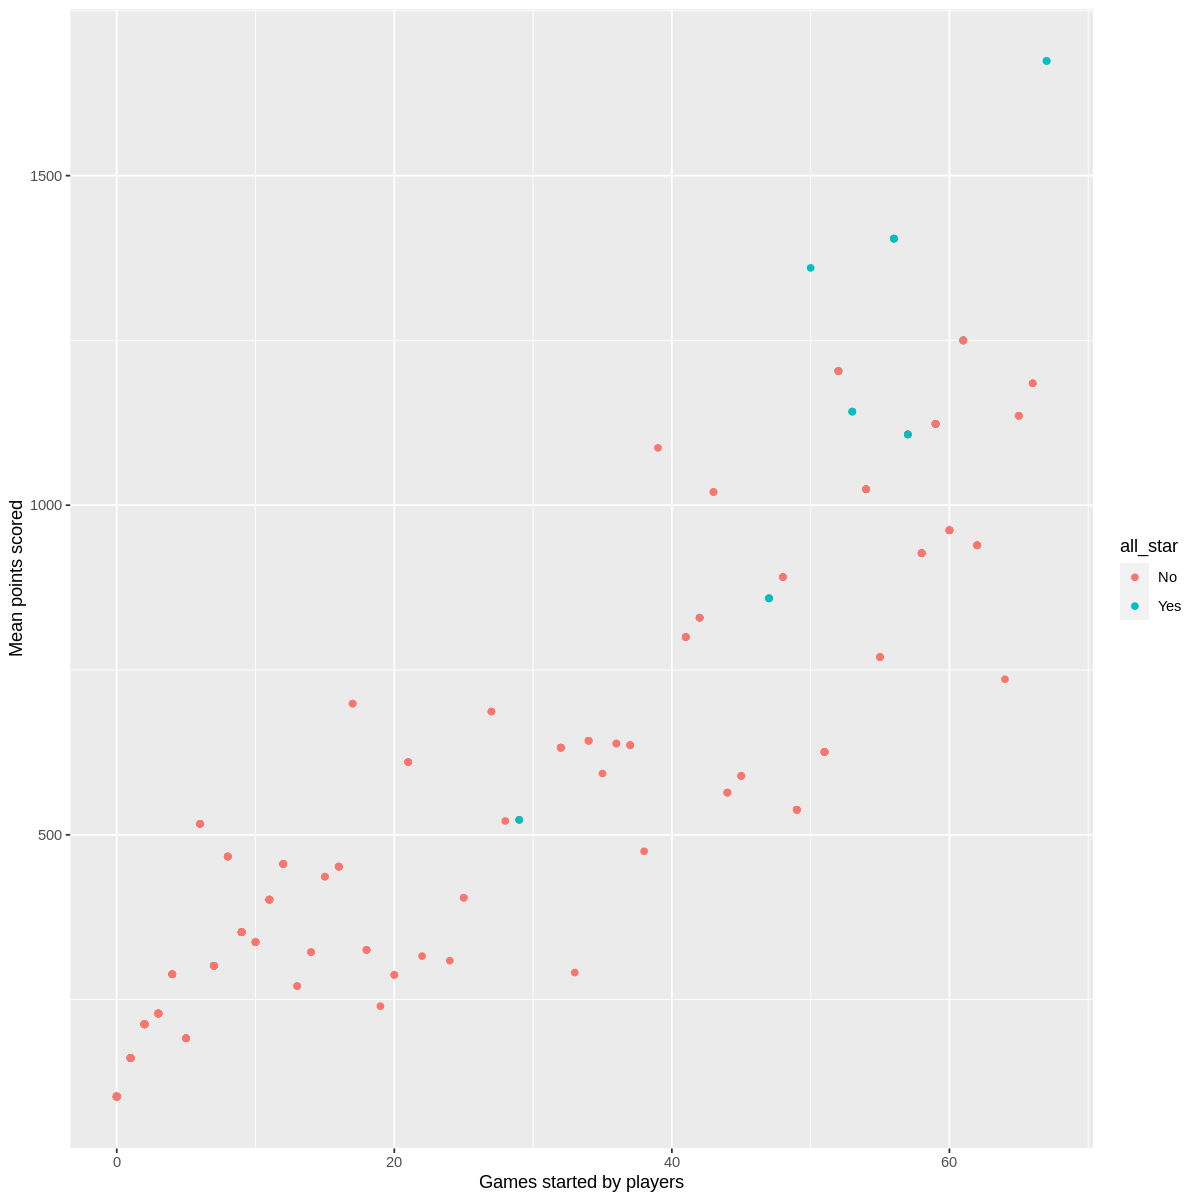

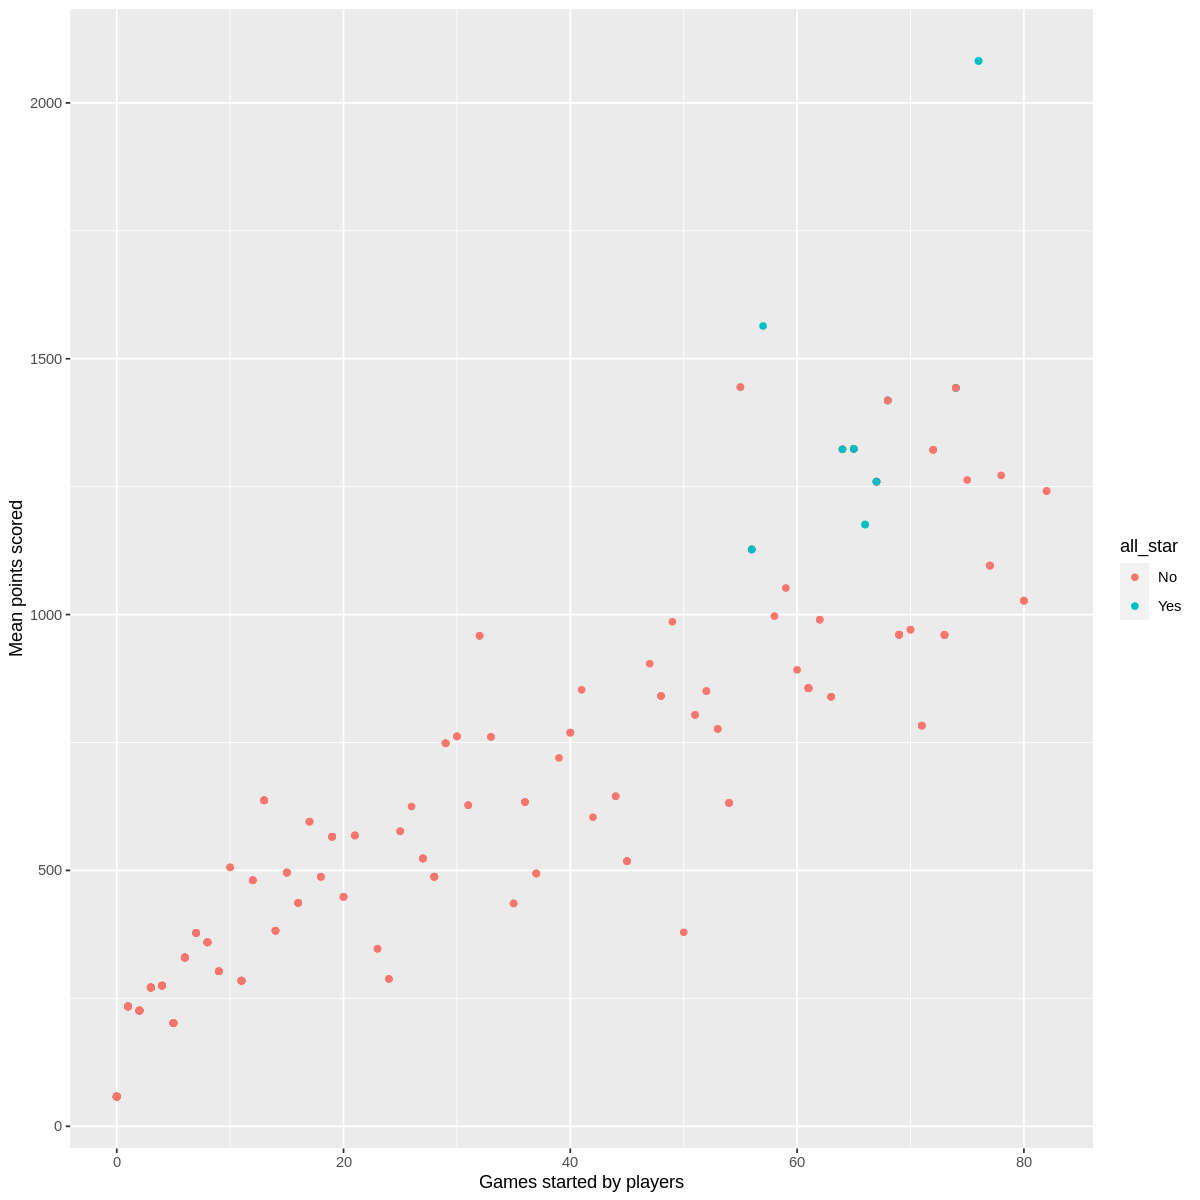

In [13]:
set.seed(123)

options(repr.plot.width = 10, repr.plot.height = 10)
#let's plot games started against the mean number of points to visualize this.
gs_against_meanpts_2023 <- summary_2023 |>
                      ggplot(aes(x = games_started, y= mean_points, color=all_star)) +
                      geom_point() +
                      labs(x= "Games started by players", y= "Mean points scored")
gs_against_meanpts_2023

gs_against_meanpts_2022 <- summary_2022 |>
                      ggplot(aes(x = games_started, y= mean_points, color=all_star)) +
                      geom_point() +
                      labs(x= "Games started by players", y= "Mean points scored")
gs_against_meanpts_2022

This shows that the higher the number of games started, the higher the average number of points scored per game, 
increasing such a player's chances of making it into the all star selections. We'll analyze how effective field goal affects all star selections later.

In [14]:
#let's group by all star players, and find the mean points scored.
summary1_2023 <- new_obs_training_2023 |>
            group_by(all_star) |> 
            summarize(mean_points = mean(points))
summary1_2023

summary1_2022 <- new_obs_training_2022 |>
            group_by(all_star) |> 
            summarize(mean_points = mean(points))
summary1_2022

#Here we can see that players who got selected as all star players have higher points per game on average.
#This further supports the above graph. 

all_star,mean_points
<fct>,<dbl>
No,375.5249
Yes,1427.3636


all_star,mean_points
<fct>,<dbl>
No,403.5758
Yes,1578.2778


We can see number of points will be an important variable! Now let's see about games started and points scored. 

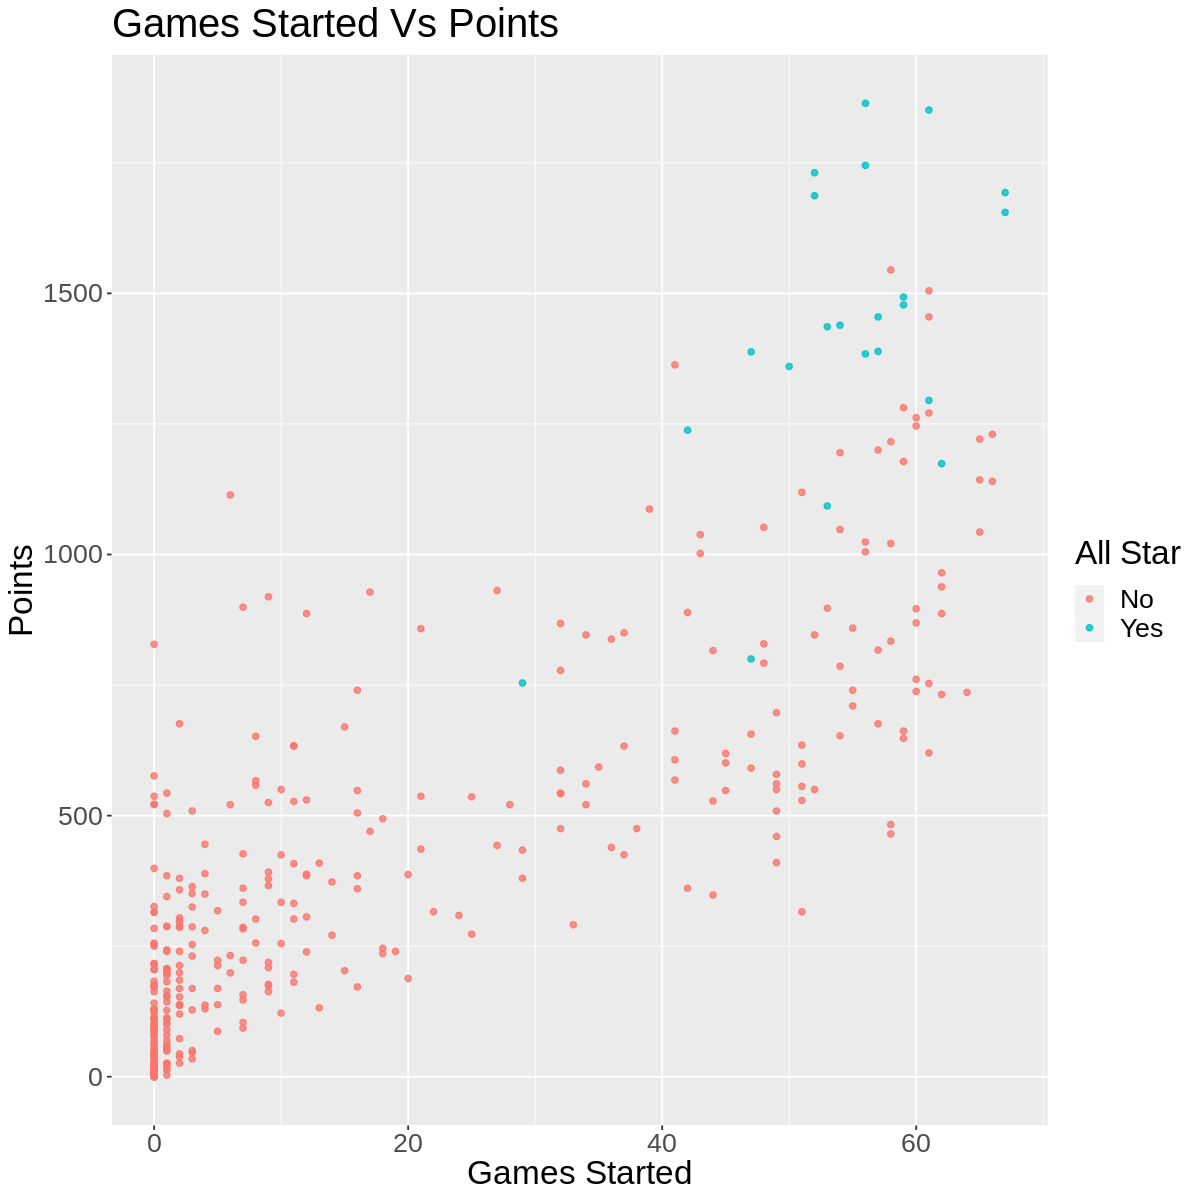

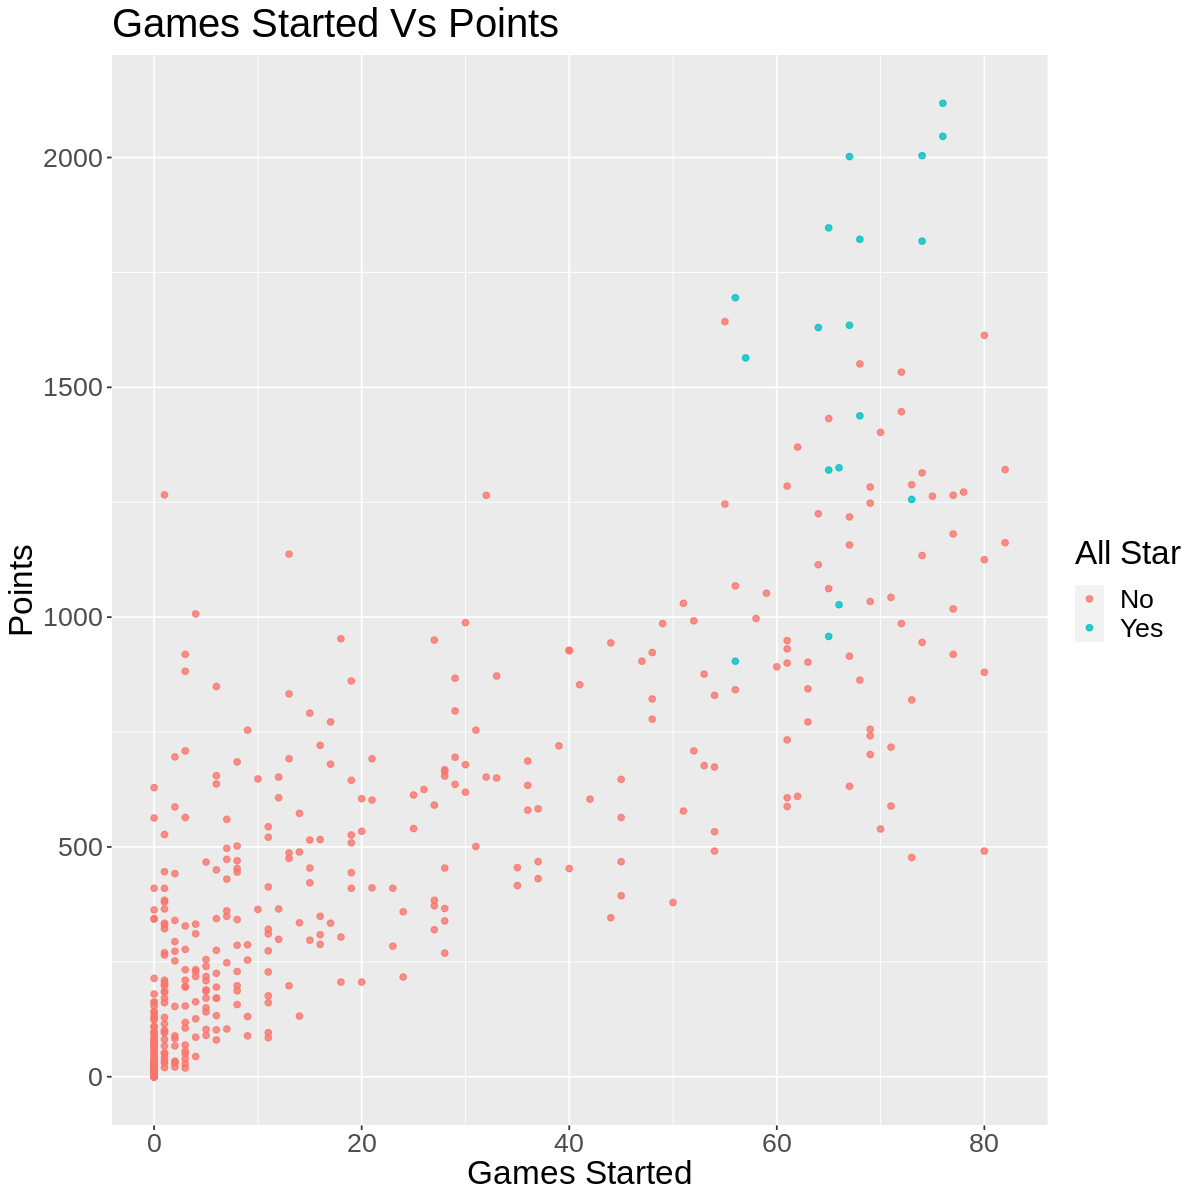

In [15]:
#what about games started vs points scored? How does the number of games started affect number of points scored?
new_obs_training_2023 |>
    ggplot(aes(x = games_started, y = points, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Games Started", y = "Points", color = "All Star", title = "Games Started Vs Points") +
    theme(text = element_text(size = 20))

new_obs_training_2022 |>
    ggplot(aes(x = games_started, y = points, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Games Started", y = "Points", color = "All Star", title = "Games Started Vs Points") +
    theme(text = element_text(size = 20))

Seems like players who have more games started, and hence higher points scored, will tend to be all star players. So games started is also an important variable. Let's focus on effective field goal now.

In [16]:
#let's group by the points scored by the players and see the relationship between it and the effective field goal. 
summary2_2023 <- new_obs_training_2023 |>
            group_by(points) |> 
            summarize(mean_efg = mean(effective_field_goal),  all_star = all_star) |>
            filter(all_star == "Yes")
summary2_2023

summary2_2022 <- new_obs_training_2022 |>
            group_by(points) |> 
            summarize(mean_efg = mean(effective_field_goal),  all_star = all_star) |>
            filter(all_star == "Yes")
summary2_2022

#we don't seem to see any sort of relationship between points scored and the effective field goal,
#but let's get a bigger picture through a simple plot.

`summarise()` has grouped output by 'points'. You can override using the
`.groups` argument.


points,mean_efg,all_star
<dbl>,<dbl>,<fct>
754,0.615,Yes
800,0.554,Yes
1093,0.587,Yes
⋮,⋮,⋮
1745,0.532,Yes
1851,0.537,Yes
1864,0.566,Yes


`summarise()` has grouped output by 'points'. You can override using the
`.groups` argument.


points,mean_efg,all_star
<dbl>,<dbl>,<fct>
904,0.5845,Yes
958,0.5360,Yes
1027,0.7130,Yes
⋮,⋮,⋮
2004,0.620,Yes
2046,0.526,Yes
2118,0.521,Yes


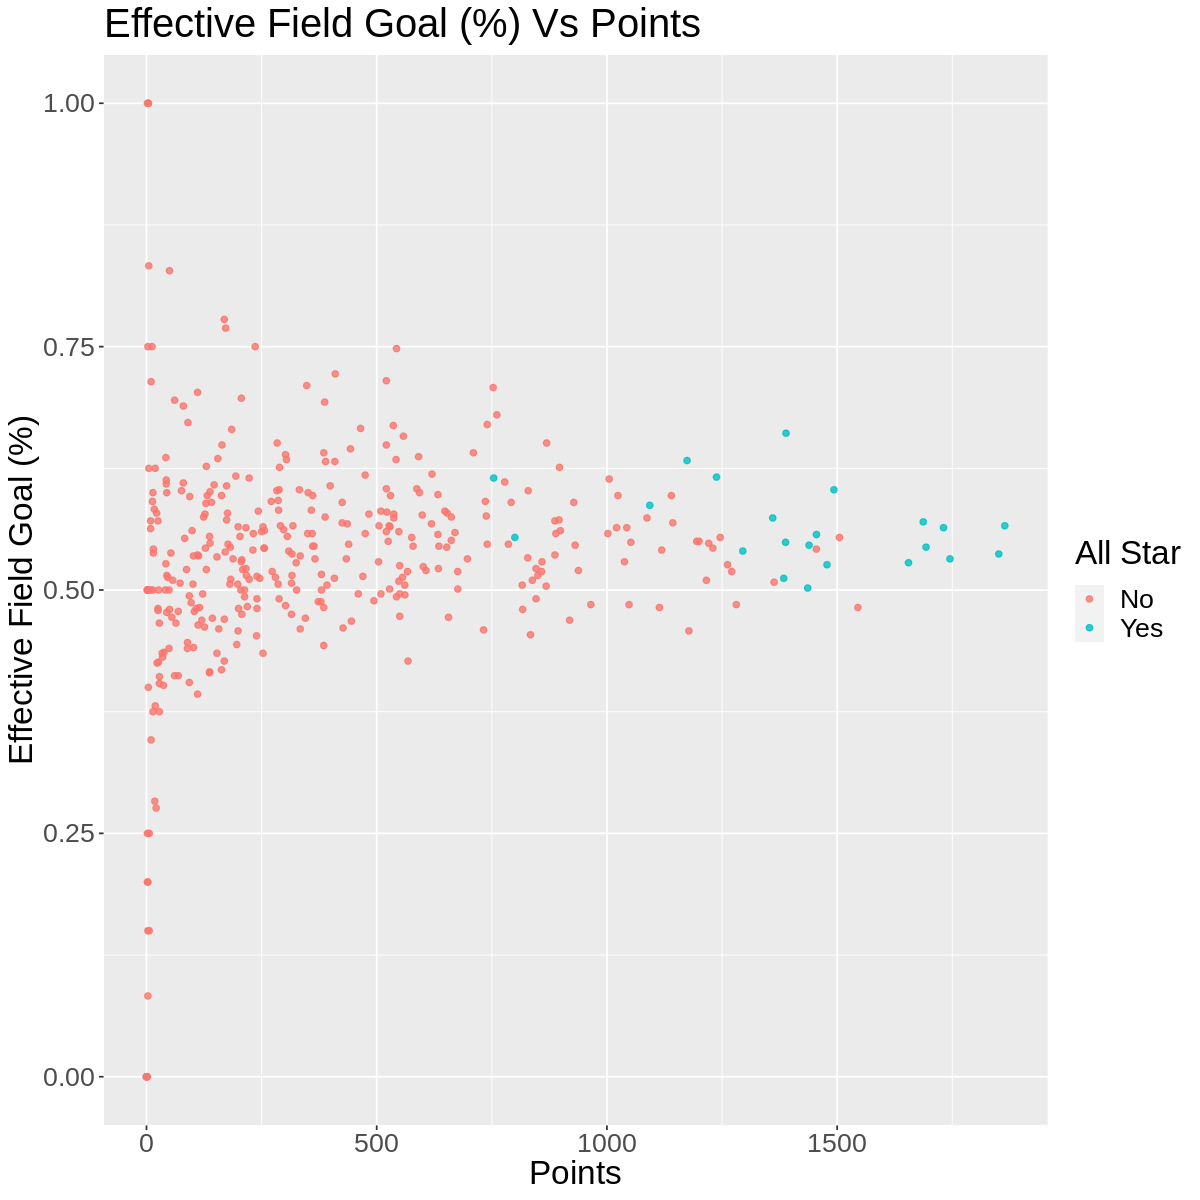

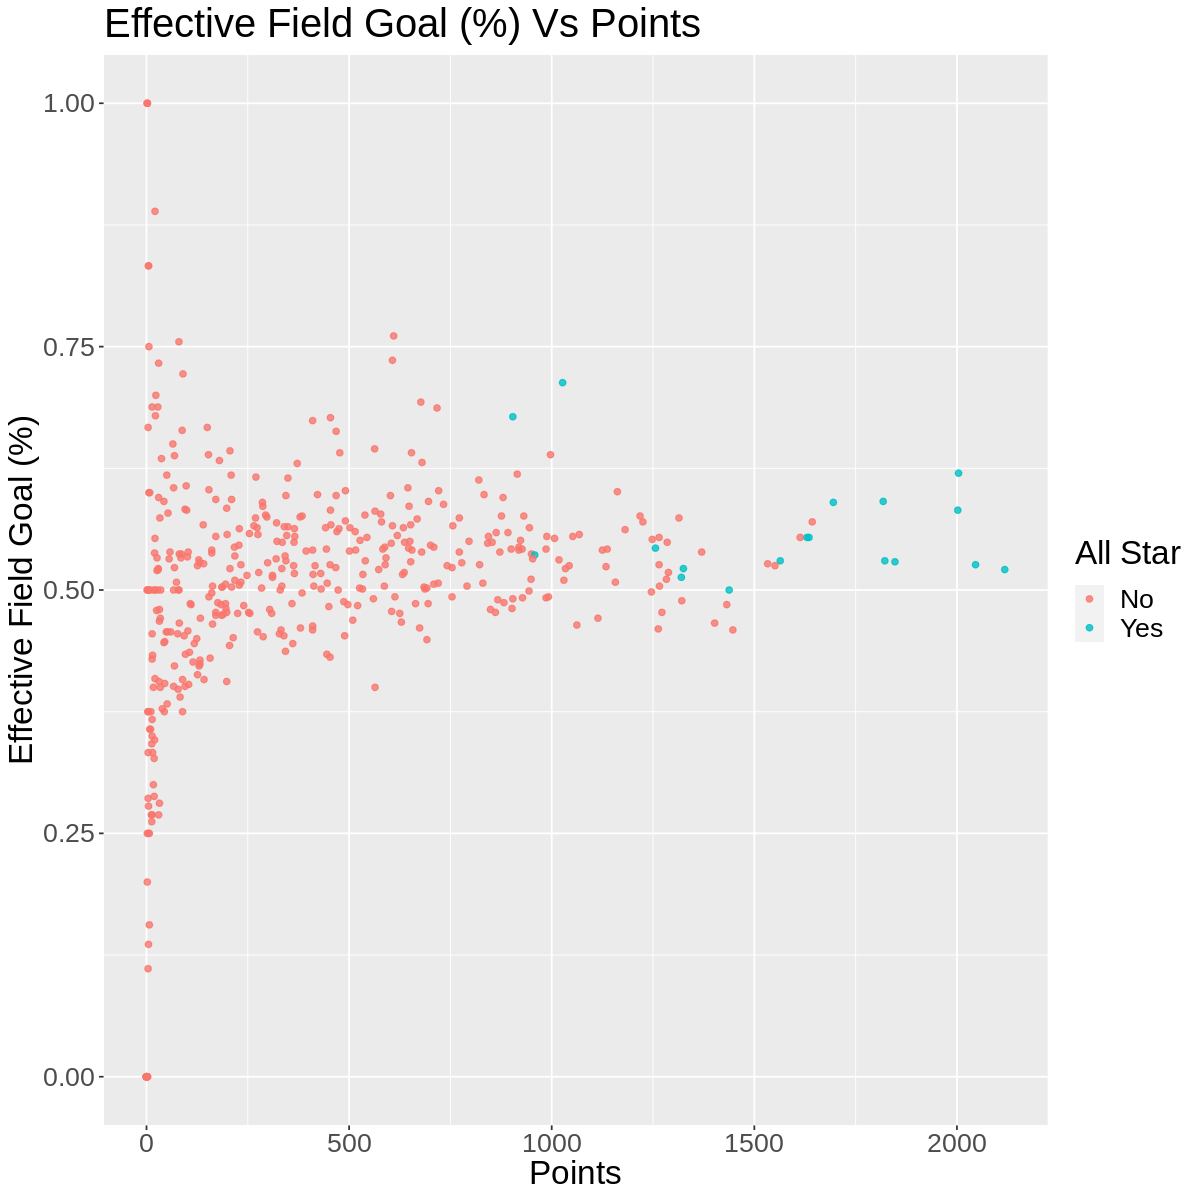

In [17]:
set.seed(123)
new_obs_training_2023 |>
    ggplot(aes(x = points, y = effective_field_goal, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Points", y = "Effective Field Goal (%)", color = "All Star", title = "Effective Field Goal (%) Vs Points") +
    theme(text = element_text(size = 20))

new_obs_training_2022 |>
    ggplot(aes(x = points, y = effective_field_goal, color=all_star)) +
    geom_point(alpha = 0.8) +
    labs(x = "Points", y = "Effective Field Goal (%)", color = "All Star", title = "Effective Field Goal (%) Vs Points") +
    theme(text = element_text(size = 20))

Here we can see that although the effective field goal remains more or less the same, players with higher points scored per game
have effective field goal ranging from 0.66825 and 0.537. So a player with high points scored and effective field goal in the given range is most likely worthy of being an All Star player. 

## What do we expect to find? Our impact? And further questions?

Our data analysis suggests that high-scoring players who start more games and have effective field goal percentages in the given range are more likely to become All Star players, but other factors could also be at play. Our proposal aims to use this analysis to predict future All Star players and develop similar models for predicting other beneficial player factors. These classification models could also help answer questions about physical attributes that contribute to player success, improving team strategies, and other areas where data science has significant potential.


**___________________________________________________________________**

## Performing the Classification and training the model.

Let's start the data analysis to answer find which NBA players will make it into the All-Star selections using Classification. First let's train a knn model. We don't know the number of nearest neighbors so we will tune in order to find the optimal number of K for our model. We use cross validation. 

In [18]:
#let's open the dataset we'll be working on once again for clarity. This is the 2022 training dataset we split initially.

new_obs_training_2022

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Henry,0,0.200,2,No
Aaron Nesmith,3,0.481,196,No
Aaron Wiggins,35,0.525,416,No
⋮,⋮,⋮,⋮,⋮
Zavier Simpson,4,0.375,44,No
Zeke Nnaji,1,0.616,270,No
Ziaire Williams,31,0.540,501,No


In [20]:
#Let's construct and prepare the recipe using the training data first

nba_2022_recipe <- recipe(all_star ~ games_started + effective_field_goal + points, data = new_obs_training_2022) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
nba_2022_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [22]:
knn_2022_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(nba_2022_recipe) |>
  add_model(knn_2022_spec) |>
  fit(data = new_obs_training_2022)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03579418
Best kernel: rectangular
Best k: 3

In [24]:
nba_2022_test_predictions <- predict(knn_fit, new_obs_testing_2022) |>
  bind_cols(new_obs_testing_2022)
nba_2022_test_predictions

nba_2022_prediction_accuracy <- nba_2022_test_predictions |>
         metrics(truth = all_star, estimate = .pred_class)  
nba_2022_prediction_accuracy

.pred_class,player,games_started,effective_field_goal,points,all_star
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
No,Aaron Gordon,75,0.573,1126,No
No,Aaron Holiday,15,0.504,400,No
No,Admiral Schofield,1,0.519,146,No
⋮,⋮,⋮,⋮,⋮,⋮
No,Xavier Sneed,0,0.250,5,No
No,Yves Pons,0,0.406,13,No
No,Zylan Cheatham,0,0.000,0,No


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9597315
kap,binary,0.3791667


In [25]:
nba_2022_mat <- nba_2022_test_predictions |> 
       conf_mat(truth = all_star, estimate = .pred_class)
nba_2022_mat

          Truth
Prediction  No Yes
       No  141   3
       Yes   3   2

In [48]:
nba_2022_vfold <- vfold_cv(new_obs_training_2022, v = 5, strata = all_star)
value_k <- tibble(neighbors = seq(from = 2,to = 20 , by = 1))


In [49]:
nba_2022_resample_fit <- workflow() |>
       add_recipe(nba_2022_recipe) |>
       add_model(knn_2022_spec) |>
       fit_resamples(resamples = nba_2022_vfold)

In [50]:
nba_2022_metrics <- nba_2022_resample_fit |> 
  collect_metrics() 
nba_2022_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9642197,5,0.009647263,Preprocessor1_Model1
roc_auc,binary,0.9386732,5,0.030406015,Preprocessor1_Model1


In [51]:
set.seed(2022)

knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [52]:
knn_results_2022 <- workflow() |>
       add_recipe(nba_2022_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = nba_2022_vfold, grid = value_k) |>
       collect_metrics()

knn_results_2022

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9776030,5,0.003573155,Preprocessor1_Model01
2,roc_auc,binary,0.8782881,5,0.062647963,Preprocessor1_Model01
3,accuracy,binary,0.9642197,5,0.009647263,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,roc_auc,binary,0.9556849,5,0.021658636,Preprocessor1_Model18
20,accuracy,binary,0.9754307,5,0.008936106,Preprocessor1_Model19
20,roc_auc,binary,0.9607053,5,0.021691113,Preprocessor1_Model19


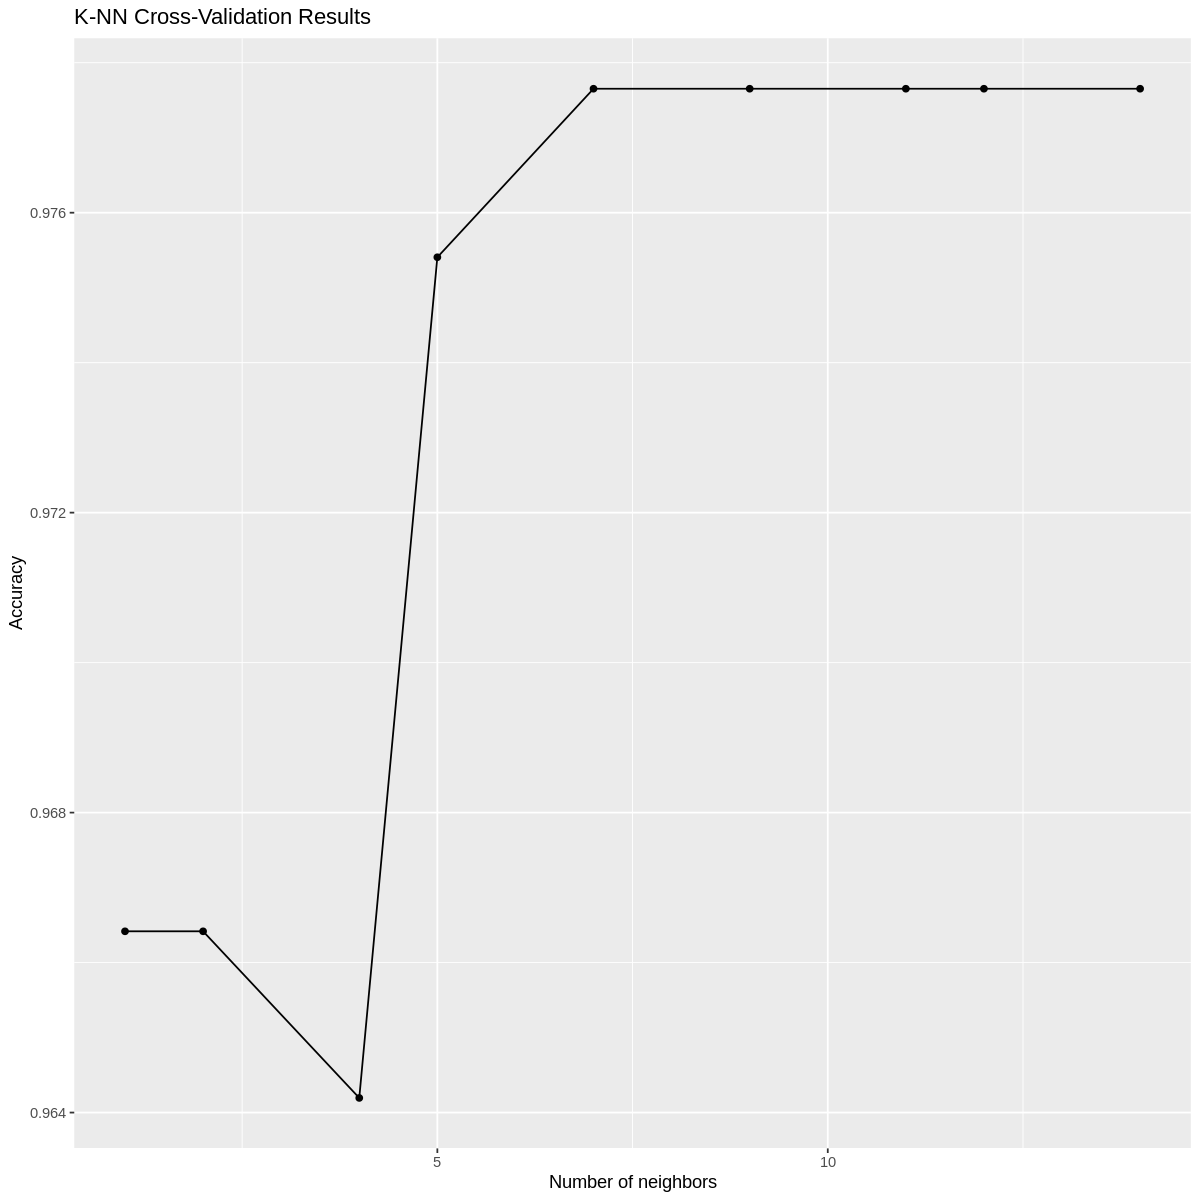

In [53]:
accuracies_2022 <- knn_results |> 
       filter(.metric == "accuracy")

cross_val_plot <- accuracies_2022 %>%
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of neighbors", y = "Accuracy", title = "K-NN Cross-Validation Results")

cross_val_plot

In [58]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |> 
  set_engine("kknn") |> 
  set_mode("classification")

mnist_fit <- workflow() |>
  add_recipe(nba_2022_recipe) |>
  add_model(mnist_spec) |>
  fit(data = new_obs_training_2022)

In [61]:
mnist_predictions <- predict(mnist_fit, new_obs_testing_2022)
    bind_cols(new_obs_testing_2022)
mnist_metrics <- mnist_predictions |>
    metrics(truth = all_star, estimate = .pred_class)
mnist_metrics
mnist_conf_mat <- mnist_predictions |>
    conf_mat(truth = all_star, estimate = .pred_class)
mnist_conf_mat

player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Holiday,15,0.504,400,No
Admiral Schofield,1,0.519,146,No
⋮,⋮,⋮,⋮,⋮
Xavier Sneed,0,0.250,5,No
Yves Pons,0,0.406,13,No
Zylan Cheatham,0,0.000,0,No


player,games_started,effective_field_goal,points,all_star
<chr>,<dbl>,<dbl>,<dbl>,<fct>
Aaron Gordon,75,0.573,1126,No
Aaron Holiday,15,0.504,400,No
Admiral Schofield,1,0.519,146,No
⋮,⋮,⋮,⋮,⋮
Xavier Sneed,0,0.250,5,No
Yves Pons,0,0.406,13,No
Zylan Cheatham,0,0.000,0,No


ERROR: [1m[33mError[39m:[22m
[33m![39m object 'all_star' not found


## References